In [ ]:
import os
import pandas as pd
from PIL import Image
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt

In [ ]:
import zipfile
import pathlib
image_path = pathlib.Path("images")
with zipfile.ZipFile('dataset.zip', "r") as zip_ref:
  zip_ref.extractall(image_path)

In [ ]:
dataset = pd.read_csv('sports.csv')

In [ ]:
dataset = dataset.drop(['class id', 'data set'], axis = 1)
dataset

,filepaths,labels
0,train/air hockey/001.jpg,air hockey
1,train/air hockey/002.jpg,air hockey
2,train/air hockey/003.jpg,air hockey
3,train/air hockey/004.jpg,air hockey
4,train/air hockey/005.jpg,air hockey
...,...,...
14488,valid/wingsuit flying/1.jpg,wingsuit flying
14489,valid/wingsuit flying/2.jpg,wingsuit flying
14490,valid/wingsuit flying/3.jpg,wingsuit flying
14491,valid/wingsuit flying/4.jpg,wingsuit flying


In [ ]:
class CustomDataset(torch.utils.data.DataLoader):
  def __init__(self, root, csv_file, transform = None):
    self.root = root
    self.transform = transform
    self.dataset = pd.read_csv(csv_file).drop(['class id', 'data set'], axis = 1)
    self.classes = sorted(list(self.dataset["labels"].unique()))
    self.class_to_idx = {class_name : idx for idx, class_name in enumerate(self.classes)}

  def __len__(self):
    return len(self.classes)

  def __getitem__(self, idx):
    image_name = self.dataset.iloc[idx, 0]
    label_name = self.dataset.iloc[idx, 1]
    image_path = os.path.join(self.root, image_name)
    image = Image.open(image_path).convert('RGB')

    if self.transform:
      image = self.transform(image)

    label_idx = self.class_to_idx[label_name]
    label_one_hot = torch.nn.functional.one_hot(torch.tensor(label_idx), len(self.classes)).float()


    return image, label_one_hot

In [ ]:
data = CustomDataset("images", "sports.csv")

In [ ]:
data.dataset.iloc[:, 0]

,filepaths
0,train/air hockey/001.jpg
1,train/air hockey/002.jpg
2,train/air hockey/003.jpg
3,train/air hockey/004.jpg
4,train/air hockey/005.jpg
...,...
14488,valid/wingsuit flying/1.jpg
14489,valid/wingsuit flying/2.jpg
14490,valid/wingsuit flying/3.jpg
14491,valid/wingsuit flying/4.jpg


In [ ]:
len(data)

100

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = CustomDataset("images", "sports.csv", transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

torch.Size([1, 3, 224, 224])
torch.Size([1, 100])
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
torch.Size([3, 224, 224])
<class 'numpy.ndarray'>
(224, 224, 3)


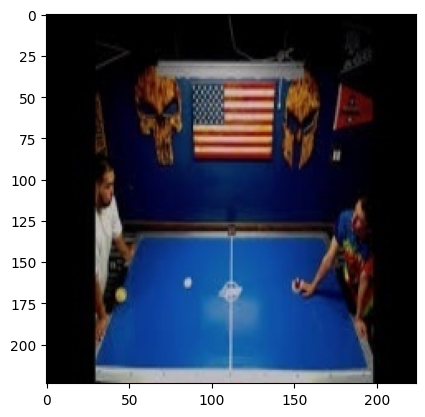

In [ ]:
for images, labels in dataloader:
  print(images.shape)
  print(labels.shape)
  print(labels[0])
  image = images.squeeze() # images[0]
  print(image.shape)
  permuted_image = image.permute(1, 2, 0).numpy()
  print(type(permuted_image))
  print(permuted_image.shape)
  plt.imshow(permuted_image)
  break